In [ ]:
!mkdir dataset
!wget https://raw.githubusercontent.com/GiuseppeMoscarelli/Thoracic-Surgery/main/dataset/CleanThoracicSurgery.csv -P dataset -nc

mkdir: cannot create directory ‘dataset’: File exists
File ‘dataset/CleanThoracicSurgery.csv’ already there; not retrieving.



In [ ]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

binary_categories = ['Pain', 'Haemoptysis', 'Dyspnoea', 'Cough',
'Weakness', 'Diabetes_Mellitus', 'MI_6mo', 'PAD',
'Smoking', 'Asthma', 'Death_1yr']

In [ ]:
DATASET_PATH = Path('.') / 'dataset' / 'CleanThoracicSurgery.csv'


def load_dataset():
    df = pd.read_csv(DATASET_PATH)
    return df

Positive samples: 69
Negative samples: 386



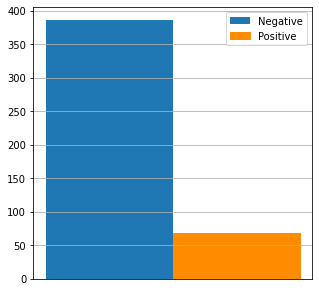

In [ ]:
df = load_dataset()

x_labels = list(df.keys()[0:-1])
y_label = df.keys()[-1]

df_positive = df[df[y_label] == True]
df_negative = df[df[y_label] == False]

print(f"Positive samples: {len(df_positive.index)}")
print(f"Negative samples: {len(df_negative.index)}")


hist = df[y_label].hist(figsize=(5,5), bins=2, label=("a", "b"))
hist.patches[1].set_color("darkorange")
hist.axes.get_xaxis().set_visible(False)

hist.legend([hist.patches[0], hist.patches[1]], ["Negative", "Positive"])
print()

In [ ]:
for col in ["FEV1", "FVC", "Age"]:
  df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

In [ ]:
# Split train and test set
from sklearn.model_selection import train_test_split

data = df.drop("Death_1yr", inplace=False, axis=1).values
labels = df["Death_1yr"].values

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, stratify=labels, random_state=42)
print(x_train.shape, y_train.shape)

train_df = pd.DataFrame(x_train, columns=x_labels)
train_df[y_label] = y_train

test_df = pd.DataFrame(x_test, columns=x_labels)
test_df[y_label] = y_test

(318, 16) (318,)


Applying SMOTE

[True, False, False, True, True, True, True, True, True, True, True, True, True, True, True, False] 16
Before
(318, 16) (318,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After
(540, 16) (540,)
Positive samples: 270
Negative samples: 270



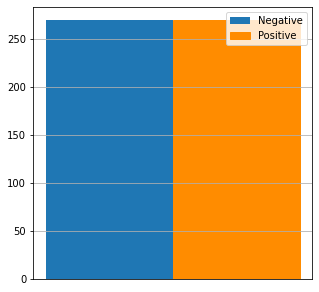

In [ ]:
from imblearn.over_sampling import SMOTENC 

categorical_features = [(df[c].dtype == "object" or c in binary_categories) for c in x_labels]

print(categorical_features, len(categorical_features))

sm = SMOTENC(random_state=42, categorical_features=categorical_features, sampling_strategy='not majority')
# sm = SMOTENC(random_state=42, categorical_features=categorical_features, sampling_strategy='minority')
print("Before")
print(x_train.shape, y_train.shape)
x_train_smote, y_train_smote = sm.fit_resample(x_train, y_train)
print("After")
print(x_train_smote.shape, y_train_smote.shape)

train_smote_df = pd.DataFrame(x_train_smote, columns=x_labels)
train_smote_df[y_label] = y_train_smote


df_positive = train_smote_df[train_smote_df[y_label] == True]
df_negative = train_smote_df[train_smote_df[y_label] == False]

print(f"Positive samples: {len(df_positive.index)}")
print(f"Negative samples: {len(df_negative.index)}")


hist = train_smote_df[y_label].hist(figsize=(5,5), bins=2)
hist.patches[1].set_color("darkorange")
hist.axes.get_xaxis().set_visible(False)

hist.legend([hist.patches[0], hist.patches[1]], ["Negative", "Positive"])
print()


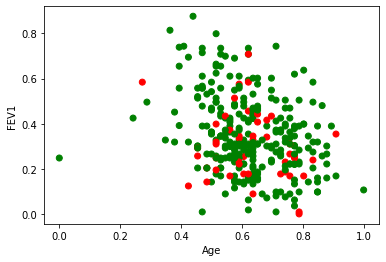

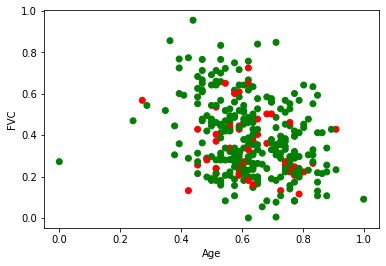

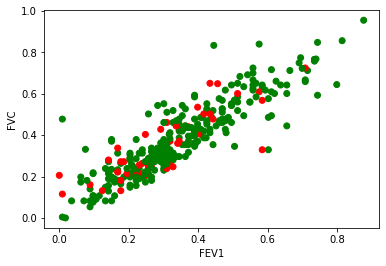

In [ ]:
colors = ["red" if label == True else "green" for label in train_df[y_label]]
plt.scatter(train_df.Age, train_df.FEV1, marker='o', c=colors)
plt.xlabel('Age')
plt.ylabel('FEV1')
plt.show()

plt.scatter(train_df.Age, train_df.FVC, marker='o', c=colors)
plt.xlabel('Age')
plt.ylabel('FVC')
plt.show()

plt.scatter(train_df.FEV1, train_df.FVC, marker='o', c=colors)
plt.xlabel('FEV1')
plt.ylabel('FVC')
plt.show()

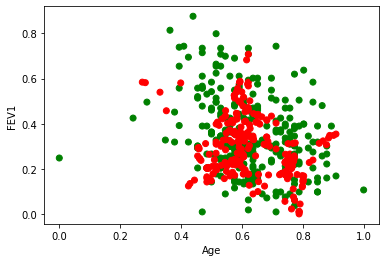

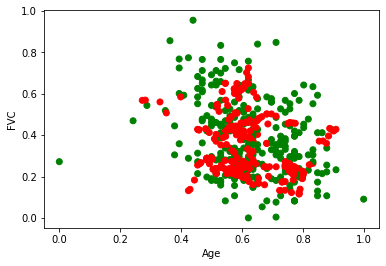

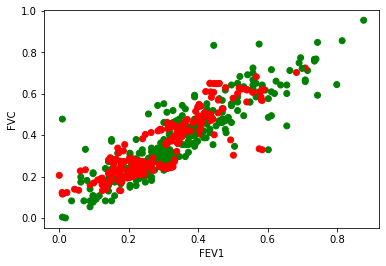

In [ ]:
colors = ["red" if label == True else "green" for label in train_smote_df[y_label]]
plt.scatter(train_smote_df.Age, train_smote_df.FEV1, marker='o', c=colors)
plt.xlabel('Age')
plt.ylabel('FEV1')
plt.show()

plt.scatter(train_smote_df.Age, train_smote_df.FVC, marker='o', c=colors)
plt.xlabel('Age')
plt.ylabel('FVC')
plt.show()

plt.scatter(train_smote_df.FEV1, train_smote_df.FVC, marker='o', c=colors)
plt.xlabel('FEV1')
plt.ylabel('FVC')
plt.show()

In [ ]:
print(train_smote_df["Death_1yr"].sum())

270


## RandomOverSampler

Before
(318, 16) (318,)
After
(540, 16) (540,)
Positive samples: 270
Negative samples: 270



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


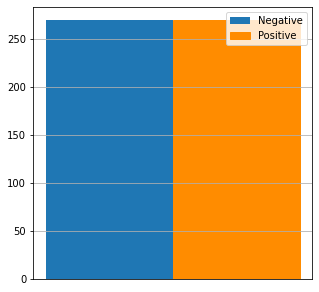

In [ ]:
from imblearn.over_sampling import RandomOverSampler 


ros = RandomOverSampler(random_state=42)
# sm = SMOTENC(random_state=42, categorical_features=categorical_features, sampling_strategy='minority')
print("Before")
print(x_train.shape, y_train.shape)
x_train_ros, y_train_ros = ros.fit_resample(x_train, y_train)
print("After")
print(x_train_ros.shape, y_train_ros.shape)

train_ros_df = pd.DataFrame(x_train_ros, columns=x_labels)
train_ros_df[y_label] = y_train_ros

df_positive = train_ros_df[train_ros_df[y_label] == True]
df_negative = train_ros_df[train_ros_df[y_label] == False]

print(f"Positive samples: {len(df_positive.index)}")
print(f"Negative samples: {len(df_negative.index)}")


hist = train_ros_df[y_label].hist(figsize=(5,5), bins=2)
hist.patches[1].set_color("darkorange")
hist.axes.get_xaxis().set_visible(False)

hist.legend([hist.patches[0], hist.patches[1]], ["Negative", "Positive"])
print()


In [ ]:
train_df.to_csv(Path('.') / 'dataset' / 'ThoracicSurgery_train.csv', index=False)
train_smote_df.to_csv(Path('.') / 'dataset' / 'ThoracicSurgery_Smote_train.csv', index=False)
train_ros_df.to_csv(Path('.') / 'dataset' / 'ThoracicSurgery_RandomOverSampler_train.csv', index=False)
test_df.to_csv(Path('.') / 'dataset' / 'ThoracicSurgery_test.csv', index=False)
